In [138]:
import numpy as np
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
folder = '/content/drive/MyDrive/Colab Notebooks/hinhTien1/'
photos, labels = list(), list()

In [142]:
#tạo data:
for file in listdir(folder):
  output = 0.0
  if file.startswith('5000'):
    output = 1.0
  if file.startswith('10000'):
    output= 2.0
  if file.startswith('20000'):
    output = 3.0
  if file.startswith('50000'):
    output = 4.0
  if file.startswith('100000'):
    output = 5.0
  if file.startswith('200000'):
    output = 6.0
  if file.startswith('500000'):
    output = 7.0
  photo = load_img(folder + '/' + file, target_size= (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)   
labels = asarray(labels)   


In [143]:
save('/content/drive/MyDrive/Colab Notebooks/nhan_dien_money1.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/nhan_dien_money2.npy', labels)

In [144]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/Colab Notebooks/nhan_dien_money1.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/nhan_dien_money2.npy')

In [145]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành hai tập huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.15, random_state=42)

In [146]:
print(x_train.shape, x_test.shape)
print(y_test.shape, y_train.shape)

(1076, 30, 40, 3) (190, 30, 40, 3)
(190,) (1076,)


In [147]:
x_train = x_train.reshape(1076, 30,40,3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(190, 30,40,3)
x_test = x_test.astype('float32')/255

In [148]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [149]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam
from keras import losses
batch_size = 67
epochs = 50
classes = 8
loss = losses

In [150]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape=(30,40,3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [151]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [152]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [153]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [154]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [155]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(512, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))

In [156]:
#Compile:
model.compile( loss =loss.categorical_crossentropy ,optimizer= "adam", metrics= ['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose= 1)
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do chinh xac:', test_acc)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_87 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_88 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                

1/1 [==============================] - 0s 26ms/step
100000


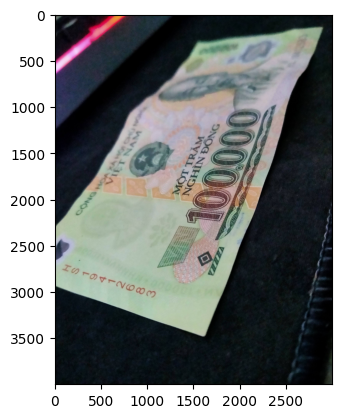

1/1 [==============================] - 0s 25ms/step
50000


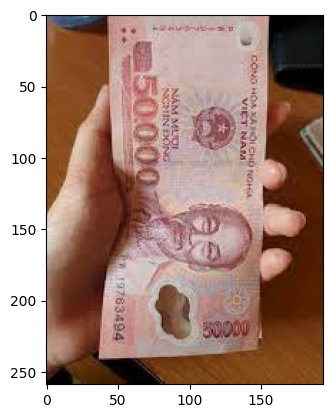

1/1 [==============================] - 0s 25ms/step
200000


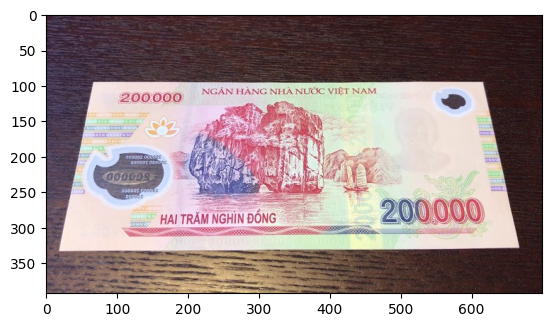

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Colab Notebooks/TienTest/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','5000', '10000', '20000', '50000', '100000', '200000', '500000']
  print(class_name[result])
  plt.show()